In [274]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
%matplotlib inline

In [275]:
df = pd.read_csv('requests_export000.tsv', delimiter = '\t')

In [330]:
df.head(5)
print(len(df))

15022923


In [277]:
df = df.dropna()

In [278]:
df_reduced = df.sample(10000)

In [279]:
df_reduced.head()

,/courses/166/files/569/preview,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2",89346,013ee67cd2f2a42eb788b1061ed14155,2015-10-07 03:34:09,05d0532840f04928dfdd86296c51189d
6774042,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,145955,219c6016e64bc2bd208a5cf9f531e65c,2014-12-04 02:58:22,05d0532840f04928dfdd86296c51189d
8539718,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,150544,324f5965809bb2a90afa8bc419568fff,2014-09-12 19:18:16,05d0532840f04928dfdd86296c51189d
11553861,/courses/166/files/568/preview?verifier=0YGs41...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,424676,49f9d95813dede0e1434d93cdf32bac3,2014-10-22 16:42:26,05d0532840f04928dfdd86296c51189d
6823085,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,128879,a0cf02bfe68d9e63784db7cd4be58ff4,2014-12-05 05:00:53,05d0532840f04928dfdd86296c51189d
5139106,/api/v1/courses/166/modules?page=2&per_page=10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,96500,f17b3bd0327831e9519add6dee058ecb,2014-11-10 19:24:03,05d0532840f04928dfdd86296c51189d


In [280]:
new_header = ['URL', 'User Agent', 'Unknown', 'UUID', 'TimeStamp', 'ClassID']
df_reduced.columns = new_header

In [281]:
df_reduced.head()

,URL,User Agent,Unknown,UUID,TimeStamp,ClassID
6774042,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,145955,219c6016e64bc2bd208a5cf9f531e65c,2014-12-04 02:58:22,05d0532840f04928dfdd86296c51189d
8539718,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,150544,324f5965809bb2a90afa8bc419568fff,2014-09-12 19:18:16,05d0532840f04928dfdd86296c51189d
11553861,/courses/166/files/568/preview?verifier=0YGs41...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,424676,49f9d95813dede0e1434d93cdf32bac3,2014-10-22 16:42:26,05d0532840f04928dfdd86296c51189d
6823085,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,128879,a0cf02bfe68d9e63784db7cd4be58ff4,2014-12-05 05:00:53,05d0532840f04928dfdd86296c51189d
5139106,/api/v1/courses/166/modules?page=2&per_page=10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,96500,f17b3bd0327831e9519add6dee058ecb,2014-11-10 19:24:03,05d0532840f04928dfdd86296c51189d


In [282]:
del df_reduced['Unknown']

In [283]:
df_reduced.head()

,URL,User Agent,UUID,TimeStamp,ClassID
6774042,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,219c6016e64bc2bd208a5cf9f531e65c,2014-12-04 02:58:22,05d0532840f04928dfdd86296c51189d
8539718,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,324f5965809bb2a90afa8bc419568fff,2014-09-12 19:18:16,05d0532840f04928dfdd86296c51189d
11553861,/courses/166/files/568/preview?verifier=0YGs41...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,49f9d95813dede0e1434d93cdf32bac3,2014-10-22 16:42:26,05d0532840f04928dfdd86296c51189d
6823085,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a0cf02bfe68d9e63784db7cd4be58ff4,2014-12-05 05:00:53,05d0532840f04928dfdd86296c51189d
5139106,/api/v1/courses/166/modules?page=2&per_page=10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,f17b3bd0327831e9519add6dee058ecb,2014-11-10 19:24:03,05d0532840f04928dfdd86296c51189d


In [284]:
dfnew = df_reduced
dflater = df_reduced

In [285]:
df_reduced['date'] = pd.to_datetime(df_reduced['TimeStamp'])

In [286]:
df_reduced.head()

,URL,User Agent,UUID,TimeStamp,ClassID,date
6774042,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,219c6016e64bc2bd208a5cf9f531e65c,2014-12-04 02:58:22,05d0532840f04928dfdd86296c51189d,2014-12-04 02:58:22
8539718,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,324f5965809bb2a90afa8bc419568fff,2014-09-12 19:18:16,05d0532840f04928dfdd86296c51189d,2014-09-12 19:18:16
11553861,/courses/166/files/568/preview?verifier=0YGs41...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,49f9d95813dede0e1434d93cdf32bac3,2014-10-22 16:42:26,05d0532840f04928dfdd86296c51189d,2014-10-22 16:42:26
6823085,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a0cf02bfe68d9e63784db7cd4be58ff4,2014-12-05 05:00:53,05d0532840f04928dfdd86296c51189d,2014-12-05 05:00:53
5139106,/api/v1/courses/166/modules?page=2&per_page=10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,f17b3bd0327831e9519add6dee058ecb,2014-11-10 19:24:03,05d0532840f04928dfdd86296c51189d,2014-11-10 19:24:03


In [287]:
df_reduced.index = df_reduced['date']
del df_reduced['date']
del df_reduced['TimeStamp']

In [288]:
df_reduced['2014-10'].head()

,URL,User Agent,UUID,ClassID
date,,,,
2014-10-22 16:42:26,/courses/166/files/568/preview?verifier=0YGs41...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,49f9d95813dede0e1434d93cdf32bac3,05d0532840f04928dfdd86296c51189d
2014-10-05 20:44:01,/api/v1/courses/166/pages/simulating-confidenc...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:32.0) G...,cd375faccca4d8c8ee4fc71625909fcc,05d0532840f04928dfdd86296c51189d
2014-10-08 15:04:29,/courses/166/files/570/preview?verifier=ZRV9FL...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,71659457065224ae174d2c7490a5ec12,05d0532840f04928dfdd86296c51189d
2014-10-25 13:24:22,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,09153877a4928466ebeefe0d0327442c,05d0532840f04928dfdd86296c51189d
2014-10-28 15:46:30,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,e8f61848f86a464159846e2724533c62,05d0532840f04928dfdd86296c51189d


In [289]:
df_reduced = df_reduced.sort()
df_reduced

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-13 22:06:50,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e3285a3f7fc205049a674f35246ec10,05d0532840f04928dfdd86296c51189d
2014-08-13 22:07:38,/api/v1/courses/164/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,e615051e71cf6f13c86385f3d6e0317c,a6ff862f8df9f99bec63a4096890db10
2014-08-15 18:21:58,/courses/166/pages/f11-exam-1/edit,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,64e7eac94789799183db4cfb1702833d,05d0532840f04928dfdd86296c51189d
2014-08-18 03:00:02,/courses/164/files/1397/preview?verifier=Yadnz...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,a0c8a26d034f06df2e5833517bf84169,a6ff862f8df9f99bec63a4096890db10
2014-08-18 04:53:34,/api/v1/courses/164/ping,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.3...,3fbbbf95e2b3f4437efc70f2d72a9d15,a6ff862f8df9f99bec63a4096890db10
2014-08-18 22:18:36,/api/v1/courses/164/module_item_sequence?asset...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,bc62bda4ed88da2bc1464483b93859c9,a6ff862f8df9f99bec63a4096890db10
2014-08-19 03:12:16,/api/v1/courses/164/pages/concepts-covered-in-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,6e4b86c2a853a9bb58bc6a184131d21c,a6ff862f8df9f99bec63a4096890db10
2014-08-19 18:08:50,/api/v1/courses/164/users?include%5B%5D=avatar...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,9d99a9d9e00509b107bc5064c9a4bff1,a6ff862f8df9f99bec63a4096890db10
2014-08-20 14:49:28,/api/v1/courses/166/students/submissions?group...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d666347cc82994e3d7e675988948a9ad,05d0532840f04928dfdd86296c51189d


In [290]:
#grouped by class
df_reduced05 = df_reduced[df_reduced.ClassID.str.contains('05d0532840f04928dfdd86296c51189d')]

In [291]:
df_reduced05['URL'].nunique() #unique page views 

835

In [292]:
df_reduced05.groupby('UUID').count().mean() #average number of page views for each student in this group

URL           4.788131
User Agent    4.788131
ClassID       4.788131
dtype: float64

In [293]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_reduced05['HofD'] = [r.hour for r in df_reduced05.index]
df_reduced05['DofM'] = [r.day for r in df_reduced05.index]
df_reduced05.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-13 22:06:50,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e3285a3f7fc205049a674f35246ec10,05d0532840f04928dfdd86296c51189d,22,13
2014-08-15 18:21:58,/courses/166/pages/f11-exam-1/edit,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,64e7eac94789799183db4cfb1702833d,05d0532840f04928dfdd86296c51189d,18,15
2014-08-20 14:49:28,/api/v1/courses/166/students/submissions?group...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d666347cc82994e3d7e675988948a9ad,05d0532840f04928dfdd86296c51189d,14,20
2014-08-20 15:17:05,/api/v1/courses/166/assignment_groups?include%...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,64e7eac94789799183db4cfb1702833d,05d0532840f04928dfdd86296c51189d,15,20
2014-08-20 18:13:25,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e3285a3f7fc205049a674f35246ec10,05d0532840f04928dfdd86296c51189d,18,20


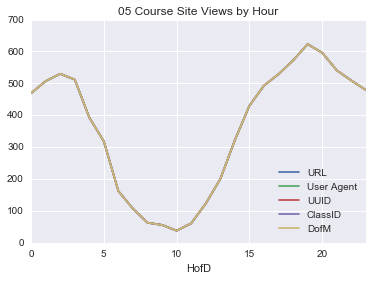

In [294]:
df_reduced05.groupby('HofD').count().plot(title='05 Course Site Views by Hour')

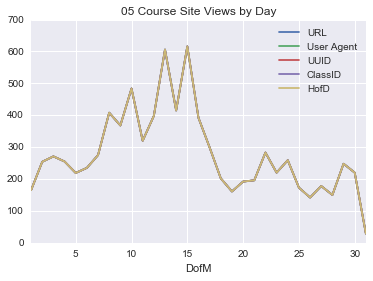

In [295]:
df_reduced05.groupby('DofM').count().plot(title = '05 Course Site Views by Day')

In [296]:
df_reduceda6 = df_reduced[df_reduced.ClassID.str.contains('a6ff862f8df9f99bec63a4096890db10')]

In [297]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_reduceda6['HofD'] = [r.hour for r in df_reduceda6.index]
df_reduceda6['DofM'] = [r.day for r in df_reduceda6.index]

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


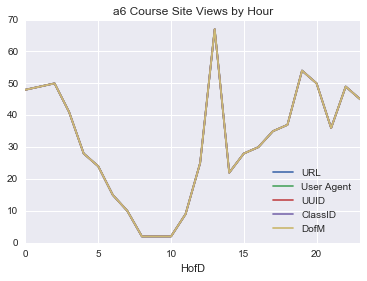

In [298]:
df_reduceda6.groupby('HofD').count().plot(title = 'a6 Course Site Views by Hour')

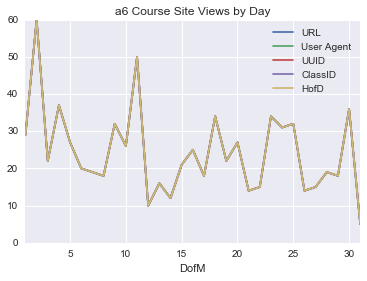

In [299]:
df_reduceda6.groupby('DofM').count().plot(title = 'a6 Course Site Views by Day')

In [300]:
df_reduced08 = df_reduced[df_reduced.ClassID.str.contains('08acd1cae6c97712fc8dbe400c35b47d')]

In [301]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_reduced08['HofD'] = [r.hour for r in df_reduced08.index]
df_reduced08['DofM'] = [r.day for r in df_reduced08.index]

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


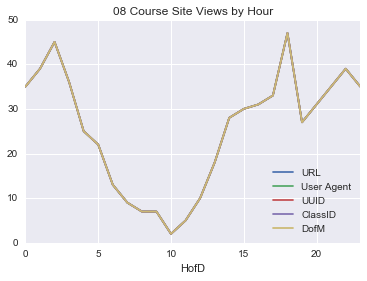

In [302]:
df_reduced08.groupby('HofD').count().plot(title = '08 Course Site Views by Hour')

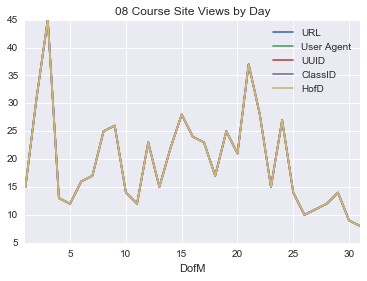

In [303]:
df_reduced08.groupby('DofM').count().plot(title = '08 Course Site Views by Day')

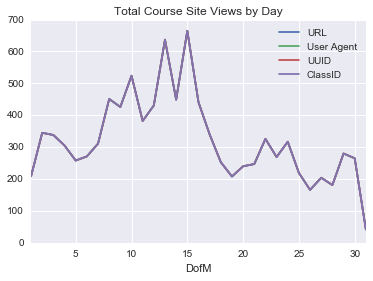

In [304]:
df_reduced['DofM'] = [r.day for r in df_reduced.index]
df_reduced.groupby('DofM').count().plot(title = 'Total Course Site Views by Day')

In [305]:
df_reduced.groupby('ClassID').count()

,URL,User Agent,UUID,DofM
ClassID,,,,
05d0532840f04928dfdd86296c51189d,8633,8633,8633,8633
08acd1cae6c97712fc8dbe400c35b47d,609,609,609,609
a6ff862f8df9f99bec63a4096890db10,758,758,758,758


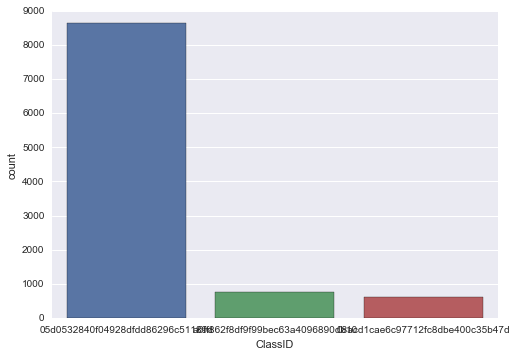

In [306]:
#count of links per class
sns.set(style="darkgrid")
sns.countplot(x="ClassID", data=df_reduced)

In [307]:
df_reduced05.groupby('UUID').count().sort(['URL']).head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,URL,User Agent,ClassID,HofD,DofM
UUID,,,,,
6e42e1c23b2bd1b8ef6d3e189670182f,1,1,1,1,1
ec1388295576e6ac458ecc40393dffed,1,1,1,1,1
3dc52e5ddce957e759e6ce3909494dff,1,1,1,1,1
1295dced0db7a3625930593944200e86,1,1,1,1,1
6f710efb4447f508b491d19923d3486d,1,1,1,1,1


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


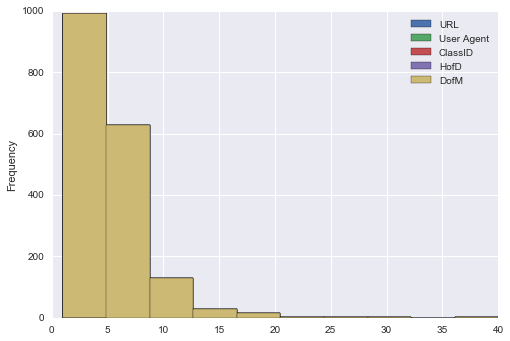

In [308]:
#distribution of usage (url views) by user ID
df_reduced05.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=10)

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


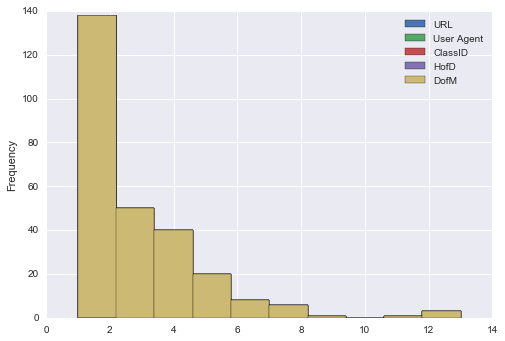

In [309]:
df_reduceda6.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=10)

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


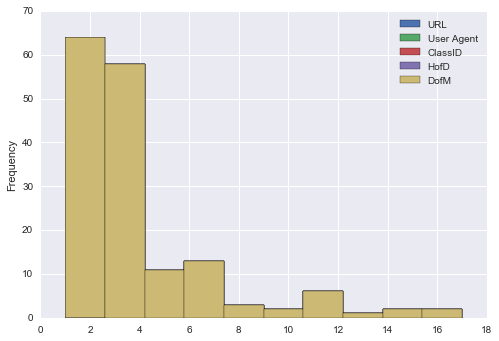

In [310]:
df_reduced08.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=10)

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


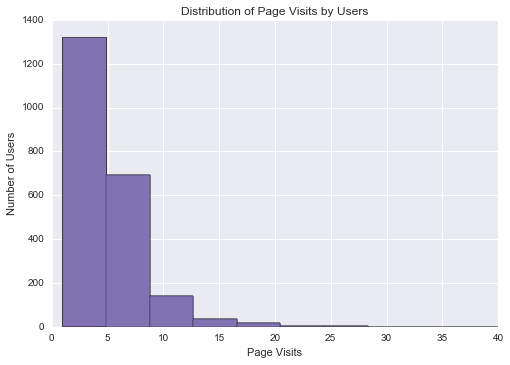

In [311]:
df_reduced.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=10, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

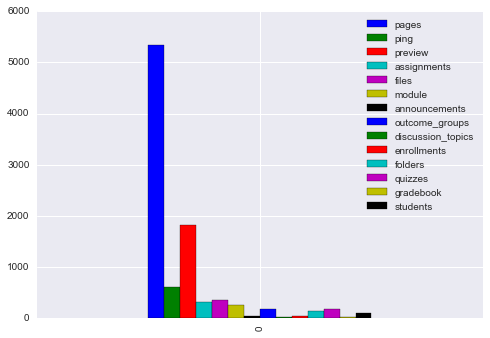

In [312]:
df_pages = pd.DataFrame()
df_pages['Views'] = df_reduced['URL'].value_counts()

df_pages

df_pageTypeCount = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns = ['pages', 'ping', 
                                                       'preview', 'assignments',
                                                       'files', 'module', 'announcements',
                                                           'outcome_groups', 'discussion_topics', 
                                                           'enrollments', 'folders', 'quizzes',
                                                                    'gradebook', 'students'])
for index, row in df_pages.iterrows():
    if index.find('pages') != -1:
        df_pageTypeCount['pages'] += row.values[0]
    elif index.find('ping') != -1:
        df_pageTypeCount['ping'] += row.values[0]
    elif index.find('preview') != -1:
        df_pageTypeCount['preview'] += row.values[0]
    elif index.find('assignments') != -1:
        df_pageTypeCount['assignments'] += row.values[0]
    elif index.find('files') != -1:
        df_pageTypeCount['files'] += row.values[0]
    elif index.find('module') != -1:
        df_pageTypeCount['module'] += row.values[0]
    elif index.find('announcements') != -1:
        df_pageTypeCount['announcements'] += row.values[0]    
    elif index.find('outcome_groups') != -1:
        df_pageTypeCount['outcome_groups'] += row.values[0] 
    elif index.find('discussion_topics') != -1:
        df_pageTypeCount['discussion_topics'] += row.values[0] 
    elif index.find('enrollments') != -1:
        df_pageTypeCount['enrollments'] += row.values[0] 
    elif index.find('folders') != -1:
        df_pageTypeCount['folders'] += row.values[0]    
    elif index.find('quizzes') != -1:
        df_pageTypeCount['quizzes'] += row.values[0] 
    elif index.find('gradebook') != -1:
        df_pageTypeCount['gradebook'] += row.values[0] 
    elif index.find('students') != -1:
        df_pageTypeCount['students'] += row.values[0] 

#only 953 results - this is the wrong way to do it; gotta make it scalable and automatically 
#create columns based on new pages
df_pageTypeCount.plot(kind='bar')

In [ ]:
#cluster
# the links below for URLs 1 thru 9 are the three most clicked links for each course, based on the sorting code that Connie did. 

dfnew['URL1'] = np.where(dfnew['URL']=='/api/v1/courses/166/ping', 1, 0)
dfnew['URL2'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/virtual-sites/revisions/latest?summary=true', 1, 0)
dfnew['URL3'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/dr-millers-lecture-003-recordings/revisions/latest?summary=true', 1, 0)

dfnew['URL4'] = np.where(dfnew['URL']=='/api/v1/courses/158/pages/sketching-videos/revisions/latest?summary=true', 1, 0)
dfnew['URL5'] = np.where(dfnew['URL']=='/api/v1/courses/158/ping', 1, 0)
dfnew['URL6'] = np.where(dfnew['URL']=='/courses/158', 1, 0)

dfnew['URL7'] = np.where(dfnew['URL']=='/api/v1/courses/164/pages/blogging/revisions/latest?summary=true', 1, 0)
dfnew['URL8'] = np.where(dfnew['URL']=='/api/v1/courses/164/ping', 1, 0)
dfnew['URL9'] = np.where(dfnew['URL']=='/courses/164/', 1, 0)


dfnew['ClassID1'] = np.where(dfnew['ClassID']=='05d0532840f04928dfdd86296c51189d', 1, 0)
dfnew['ClassID2'] = np.where(dfnew['ClassID']=='08acd1cae6c97712fc8dbe400c35b47d', 1, 0)
dfnew['ClassID3'] = np.where(dfnew['ClassID']=='a6ff862f8df9f99bec63a4096890db10', 1, 0)

dfnew = dfnew.drop('URL', 1)
dfnew = dfnew.drop('ClassID', 1)
dfnew.head(100) 


In [ ]:
#Normalize the data. (When working with a smaller subset of the data, there were NAN columns that need to be removed if you want to see the clustering
#analysis) 
df_filtered = dfnew[['URL1', 'URL2', 'URL3', 'URL4', 'URL5', 'URL6', 'URL7', 'URL8','URL9', 'ClassID1','ClassID2','ClassID3',]]
df_norm = df_filtered.apply(lambda x: (x - x.mean()) / x.std())
df_norm.head(10)

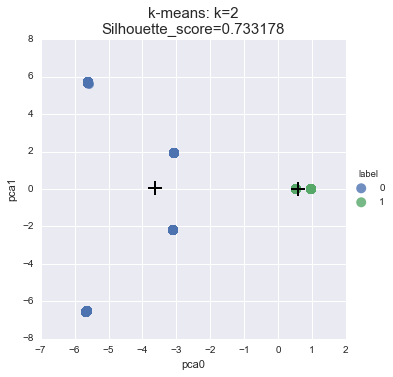

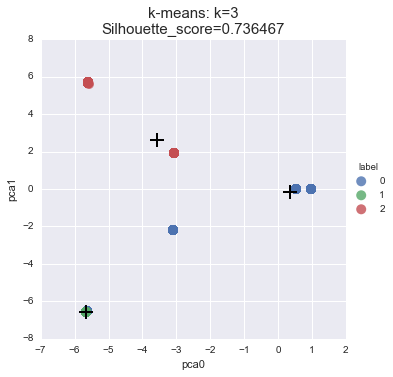

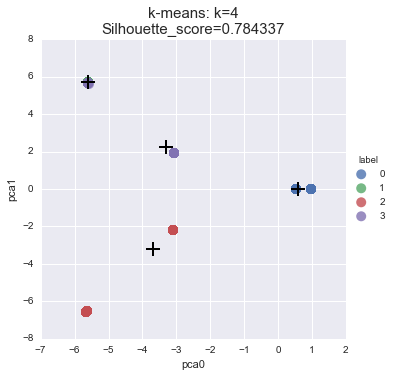

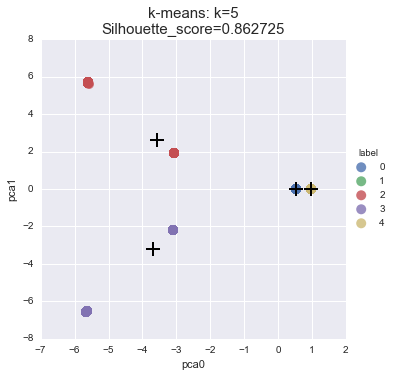

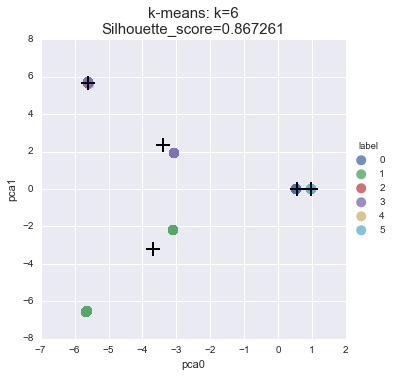

In [318]:
#kmeans clustering visualization

pca_model = skd.PCA(n_components=2).fit(df_norm)
pca_data = pca_model.transform(df_norm)
df_pca = pd.DataFrame(pca_data, columns=['pca0', 'pca1'])

for k in range(2,7):
    kmeans_model = skc.KMeans(k).fit(df_norm)
    centroids = kmeans_model.cluster_centers_
    centroids_pca = pca_model.transform(centroids)
    cluster_labels = kmeans_model.labels_
    df_pca['label'] = cluster_labels
    silh_score = skm.silhouette_score(df_norm, cluster_labels)
    
    plt.figure()
    f = sns.lmplot(x='pca0', y='pca1', data=df_pca, 
                   hue='label', fit_reg=False, 
                   scatter_kws={'s': 100})
    f.ax.scatter(centroids_pca[:,0], centroids_pca[:,1], 
                 marker='+', s=200, linewidths=2, color='black')
    plt.title('k-means: k=%d\nSilhouette_score=%f'%(
                k, silh_score), fontsize=15)

In [321]:
max_label_id = np.max(kmeans_model.labels_)
print('There are %d clusters'%max_label_id)
for i in range(1, max_label_id + 1):
    members = df_norm.index[cluster_labels == i]
    if i == 1:
        cluster1 = members
    elif i == 2:
        cluster2 = members
    elif i == 3:
        cluster3 = members
    elif i == 4:
        cluster4 = members
    elif i == 5:
        cluster5 = members
    #print('Cluster %d has %d URLS: %s'%(
    #        i, len(members), ' '.join(map(str, members))))
print(df_cluster5.values)

There are 5 clusters
[6321911 3164958]


In [ ]:
df_cluster1 = pd.DataFrame(columns=('URL', 'User Agent', 'UUID', 'ClassID'))
for member in cluster1:
    print(df_reduced.ix[member])
    df_cluster1.append(df_reduced.ix[member])
df_cluster1

URL           /api/v1/courses/158/pages/me250-home-page/revi...
User Agent    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
UUID                           b0d6893a5da4808b86a620ddc7fd2369
ClassID                        08acd1cae6c97712fc8dbe400c35b47d
DofM                                                         12
Name: 2014-12-12 01:41:50, dtype: object
URL           /api/v1/courses/158/pages/me250-home-page/revi...
User Agent    Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
UUID                           b0d6893a5da4808b86a620ddc7fd2369
ClassID                        08acd1cae6c97712fc8dbe400c35b47d
DofM                                                         21
Name: 2014-09-21 15:33:23, dtype: object
URL           /api/v1/courses/158/pages/me250-home-page/revi...
User Agent    Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
UUID                           2ad3dc8ad09204737e62d5979287c163
ClassID                        08acd1cae6c97712fc8dbe400c35b47d
DofM                  

In [326]:
df_cluster1

,URL,User Agent,UUID,ClassID
